# Proyek Analisis Data: Bike Sharing
- **Nama:** Yoga Prasetya
- **Email:** yogapmalang@gmail.com
- **ID Dicoding:** b25b9d004

## Menentukan Pertanyaan Bisnis
- Bagaimana tren penyewaan sepeda per bulan? Apakah ada bulan dengan permintaan paling tinggi atau paling rendah?
- Musim apa yang memiliki rata-rata penyewaan sepeda tertinggi dan terendah?
- Kondisi cuaca mana yang menyebabkan penyewaan sepeda paling sedikit?
- Apakah orang tetap menyewa sepeda saat hujan ringan, atau rata-rata penyewaan langsung turun drastis?

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [21]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Infact27/BikeSharing_Data/refs/heads/main/day.csv")

In [22]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Infact27/BikeSharing_Data/refs/heads/main/hour.csv")

### Assessing Data

In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


day_df.info() untuk mendapatkan informasi mengenai data pada day_df

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


hour_df.info() untuk mendapatkan informasi mengenai data pada hour_df

In [25]:
print("day_df duplikasi: ", day_df.duplicated().sum())
print("hour_df duplikasi: ", hour_df.duplicated().sum())

day_df duplikasi:  0
hour_df duplikasi:  0


untuk mencari tahu apakah ada duplikasi data pada day_df atau hour_df

**Insight:**
- pada day_df dan hour_df tidak ada data yang berisikan null
- pada day_df dan hour_df tidak ada duplikasi data
- kolom dteday memiliki tipe data object

In [26]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


day_df.describe() untuk melihat apakah ada data iregular pada day_df

In [27]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


hour_df.describe() untuk melihat apakah ada data iregular pada hour_df

**Insight:**
- tidak ada data iregular ditemukan

### Cleaning Data

In [28]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

untuk mengubah tipe data pada kolom dteday pada day_df

In [29]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

untuk mengubah tipe data pada kolom dteday pada hour_df

**Insight:**
- mengubah tipe data kolom dteday pada day_df dan hour_df menjadi datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
day_df.groupby('season')['cnt'].mean()

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


untuk mengetahui rata - rata penyewaan pada setiap musim

In [31]:
day_df.groupby('weathersit')['cnt'].mean()

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


untuk mengetahui rata - rata penyewaan pada setiap cuaca

In [32]:
monthly_rentals = day_df.groupby('mnth')['cnt'].sum().reset_index()
monthly_rentals.columns = ['Month', 'Total_Rentals']
print(monthly_rentals)

    Month  Total_Rentals
0       1         134933
1       2         151352
2       3         228920
3       4         269094
4       5         331686
5       6         346342
6       7         344948
7       8         351194
8       9         345991
9      10         322352
10     11         254831
11     12         211036


Menunjukkan data pada day_df berdasarkan kolom mnth yang berisikan jumlah penyewaan(cnt)

In [33]:
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
seasonal_rentals.columns = ['season', 'Total_Rentals']
print(seasonal_rentals)

   season  Total_Rentals
0       1         471348
1       2         918589
2       3        1061129
3       4         841613


Menunjukkan data pada day_df berdasarkan kolom season yang berisikan jumlah penyewaan(cnt)

In [34]:
weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()
weather_rentals.columns = ['weathersit', 'Total_Rentals']
print(weather_rentals)

   weathersit  Total_Rentals
0           1        2257952
1           2         996858
2           3          37869


Menunjukkan data pada day_df berdasarkan kolom weathersit yang berisikan jumlah penyewaan(cnt)

**Insight:**
Dari informasi di atas kita bisa mendapatkan informasi mengenai banyak rental pada bulan, season, dan weather tertentu :
- rata-rata penyewaan terbanyak berdasarkan season ada pada season 3
- rata-rata penyewaan paling sedikit berdasarkan season ada pada season 1

- rata-rata penyewaan terbanyak berdasarkan weathersit ada pada weathersit 1
-  rata-rata penyewaan paling sedikit berdasarkan weathersit ada pada weathersit 4

- Jumlah penyewaan terbanyak berdasarkan bulan ada pada bulan Agustus
- Jumlah penyewaan paling sedikit berdasarkan bulan ada pada bulan Januari

- Jumlah penyewaan terbanyak berdasarkan season ada pada season 3
- Jumlah penyewaan paling sedikit berdasarkan season ada pada season 1

- Jumlah penyewaan terbanyak berdasarkan weathersit ada pada weathersit 1
- Jumlah penyewaan paling sedikit berdasarkan weathersit ada pada weathersit 4

## Visualization & Explanatory Analysis

### Pertanyaan 1:

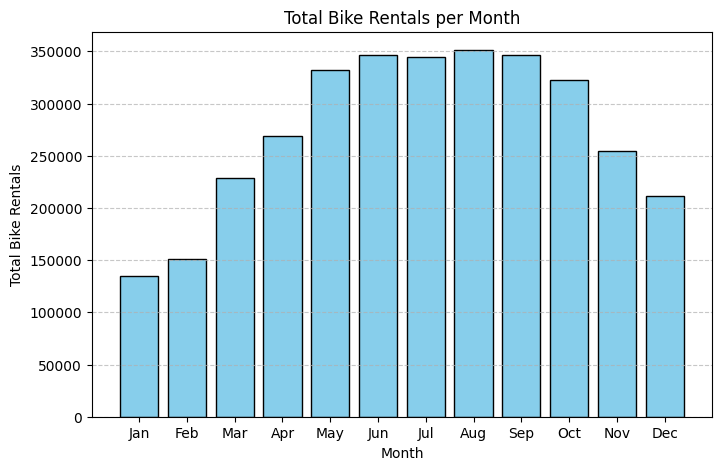

In [35]:
monthly_rentals['Month_Name'] = monthly_rentals['Month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(8, 5))
plt.bar(monthly_rentals['Month_Name'], monthly_rentals['Total_Rentals'], color='skyblue', edgecolor='black')

plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals per Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Menunjukkan data pada day_df berdasarkan kolom mnth yang berisikan jumlah penyewaan dengan menggunakan bar chart

### Pertanyaan 2:

/tmp/ipython-input-2399602725.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=avg_per_season, palette='coolwarm')


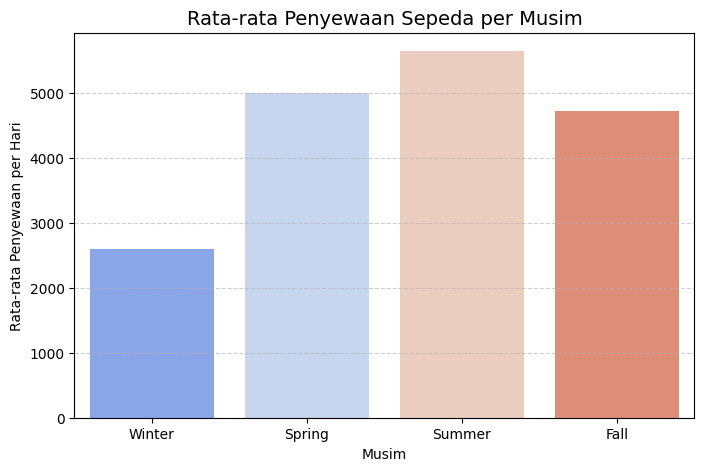

In [36]:
avg_per_season = day_df.groupby('season')['cnt'].mean().reset_index()

season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
avg_per_season['season'] = avg_per_season['season'].map(season_labels)

plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=avg_per_season, palette='coolwarm')

plt.title('Rata-rata Penyewaan Sepeda per Musim', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan per Hari')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Menunjukkan rata - rata penyewaan sepeda pada setiap musim

### Pertanyaan 3:

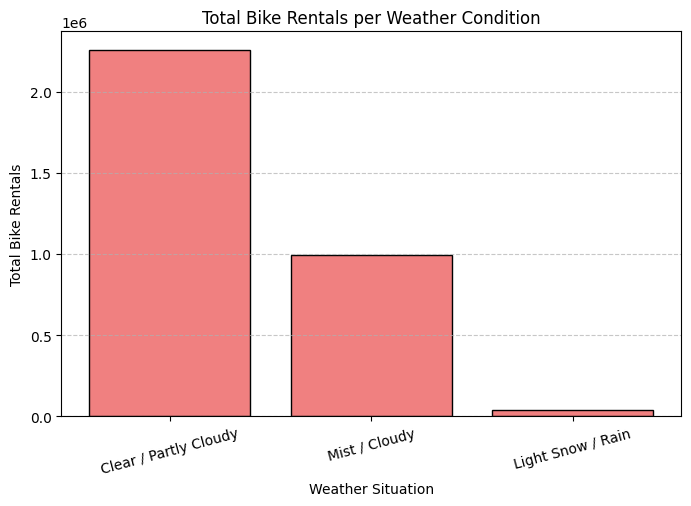

In [37]:
weather_rentals['Weather_Desc'] = weather_rentals['weathersit'].replace({
    1: 'Clear / Partly Cloudy',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Rain',
    4: 'Heavy Rain / Snow / Fog'
})

plt.figure(figsize=(8,5))
plt.bar(weather_rentals['Weather_Desc'], weather_rentals['Total_Rentals'], color='lightcoral', edgecolor='black')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals per Weather Condition')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Menunjukkan data pada day_df berdasarkan kolom weathersit yang berisikan jumlah penyewaan dengan menggunakan bar chart

### Pertanyaan 4:

/tmp/ipython-input-2341266675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=avg_per_weather, palette='coolwarm')


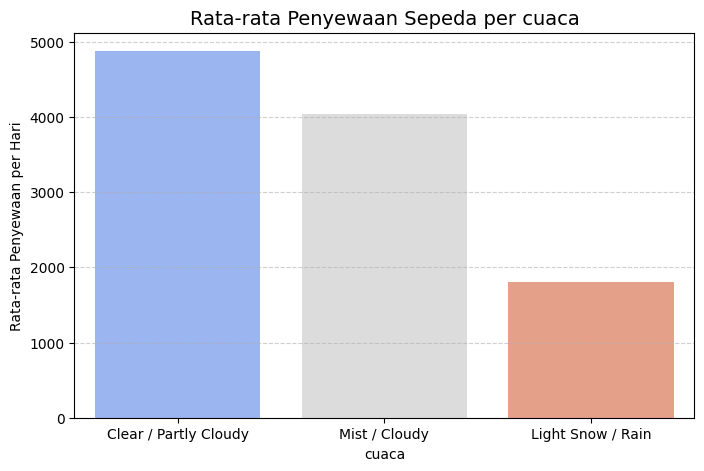

In [38]:
avg_per_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()

weather_labels = {
    1: 'Clear / Partly Cloudy',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Rain',
    4: 'Heavy Rain / Snow / Fog'}

avg_per_weather['weathersit'] = avg_per_weather['weathersit'].map(weather_labels)

plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=avg_per_weather, palette='coolwarm')

plt.title('Rata-rata Penyewaan Sepeda per cuaca', fontsize=14)
plt.xlabel('cuaca')
plt.ylabel('Rata-rata Penyewaan per Hari')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Menunjukkan rata - rata penyewaan pada setiap cuaca

## Conclusion

- Conclution pertanyaan 1 : Penyewaan sepeda mencapai puncak tertinggi pada bulan Agustus, sedangkan terendah pada bulan Januari. Hal ini kemungkinan disebabkan oleh kondisi cuaca yang lebih hangat dan hari yang lebih panjang di musim panas, sementara pada bulan Januari (musim dingin) suhu yang rendah membuat aktivitas luar ruangan berkurang.

  Rekomendasi: meningkatkan stok dan ketersediaan sepeda menjelang pertengahan tahun (musim panas) untuk mengantisipasi lonjakan permintaan.
  
  Sebaliknya, pada musim dingin, perusahaan bisa mengoptimalkan promosi atau diskon khusus untuk menjaga minat penyewaan tetap stabil.

- Conclution pertanyaan 2 : Musim Summer (musim panas) memiliki rata-rata penyewaan sepeda tertinggi, sedangkan Winter (musim dingin) memiliki penyewaan paling rendah. Kondisi ini wajar karena cuaca cerah dan suhu hangat lebih mendukung aktivitas bersepeda.

  Rekomendasi: Fokuskan strategi pemasaran dan perawatan sepeda menjelang musim panas agar sepeda dalam kondisi optimal. Selain itu, pertimbangkan untuk mengembangkan layanan alternatif di musim dingin, seperti penyewaan indoor cycling atau program loyalitas untuk pelanggan tetap.

- Conclusion pertanyaan 3 : Penyewaan sepeda tertinggi terjadi saat cuaca cerah atau berawan sebagian (Clear/Partly Cloudy), sedangkan terendah pada cuaca hujan deras (Heavy Rain). Cuaca ekstrem jelas menurunkan minat masyarakat untuk bersepeda.

  Rekomendasi : Pertimbangkan untuk menambahkan fitur informasi cuaca pada aplikasi penyewaan agar pengguna dapat merencanakan aktivitasnya. Selain itu, sediakan penutup pelindung hujan atau area parkir tertutup untuk meningkatkan kenyamanan pengguna saat cuaca tidak menentu.

- Conclusion pertanyaan 4 : Sebagian pengguna masih tetap menyewa sepeda saat hujan ringan, tetapi rata-rata jumlah penyewaan turun drastis dibanding hari tanpa hujan. Ini menunjukkan sensitivitas pengguna terhadap kondisi cuaca meski intensitas hujan rendah.

  Rekomendasi: Untuk menjaga kestabilan penyewaan saat hujan ringan, perusahaan dapat menyediakan jas hujan ringan atau perlengkapan pelindung sebagai bagian dari layanan tambahan. Selain itu, program insentif atau potongan harga saat cuaca kurang ideal bisa membantu meningkatkan jumlah penyewaan.